# Titanic Machine Learning from Disaster

### Problem Statement

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask  you to apply the tools of machine learning to predict which passengers survived the tragedy.   

It is your job to predict if a passenger survived the sinking of the Titanic or not. For each in the test set, you must predict a 0 or 1 value for the variable.   

Your score is the percentage of passengers you correctly predict. This is known simply as "accuracy".

### Data Set Description

PassengerID: unique id of the row and it doesn't have any effect on Survived   
Survived: binary 0 or 1 where 0=Not Survived and 1=Survived   
Pclass: socio-economic status of the passenger where 1=Upper Class, 2=Middle Class, 3=Lower Class   
Name, Sex, Age: self-explanatory   
SibSp: total number of passengers' siblings and spouse   
Parch: total number of passengers' parents and children   
Ticket: ticket number of the passenger   
Fare: passenger's fare   
Cabin: cabin number of the passenger   
Embarked: port of embarkation where C=Cherbourg, Q=Queenstown, S=Southhampton   

## 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import re
import time
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier, Pool, cv
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


In [3]:
# changing the display settings
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', -1)  

## 2. Import Data Set

In [4]:
train = pd.read_csv("/Users/joanna/Desktop/My Files/Data Science/Titanic/train.csv")
test = pd.read_csv("/Users/joanna/Desktop/My Files/Data Science/Titanic/test.csv")

In [5]:
data_full = pd.concat([train,test],axis=0)
data_full = data_full.reset_index().drop("index",axis=1)
data_full

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.00,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.00,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,2,1,female,1,1.0,PC 17599
2,26.00,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.00,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.00,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.00,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.00,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.00,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.00,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [6]:
data_full.shape

(1309, 12)

In [7]:
train.shape

(891, 12)

In [8]:
test.shape

(418, 11)

## 3. Data Preprocessing

### Overview of dataset

In [9]:
data_full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [10]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [11]:
# remove passengerid
data_full = data_full.drop("PassengerId",axis=1)

In [12]:
# remove ticket
data_full = data_full.drop("Ticket",axis=1)

In [13]:
data_full.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex',
       'SibSp', 'Survived'],
      dtype='object')

In [14]:
data_full.dtypes

Age         float64
Cabin       object 
Embarked    object 
Fare        float64
Name        object 
Parch       int64  
Pclass      int64  
Sex         object 
SibSp       int64  
Survived    float64
dtype: object

In [15]:
# split into numerical and categorical
data_full_numerical = data_full.select_dtypes(include=[np.number])
data_full_categorical = data_full.select_dtypes(exclude=[np.number])

### Missing values

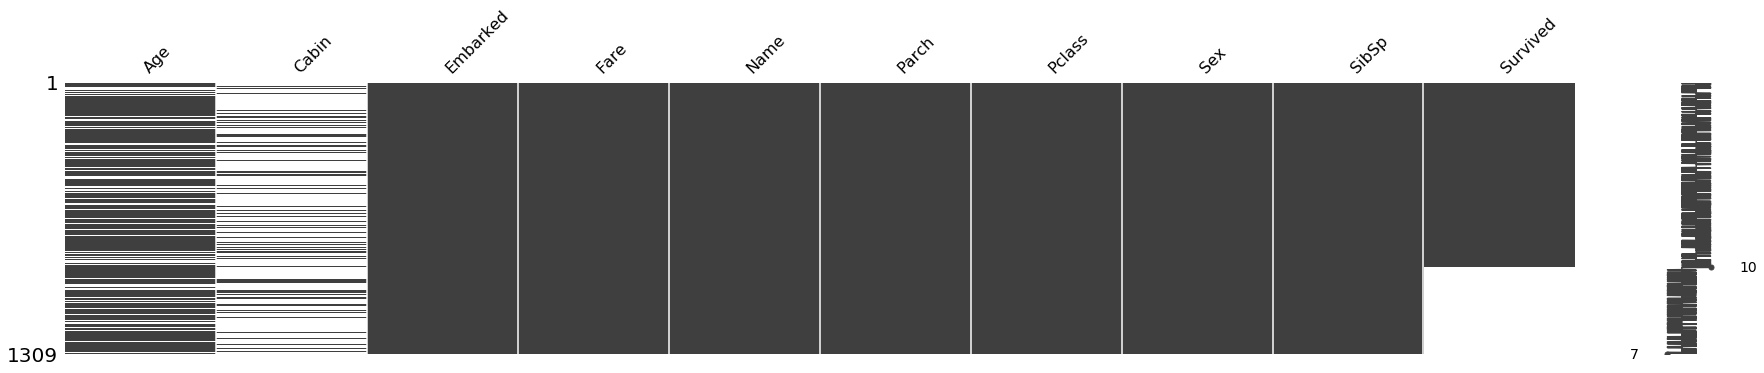

In [17]:
missingno.matrix(data_full, figsize = (30,5))

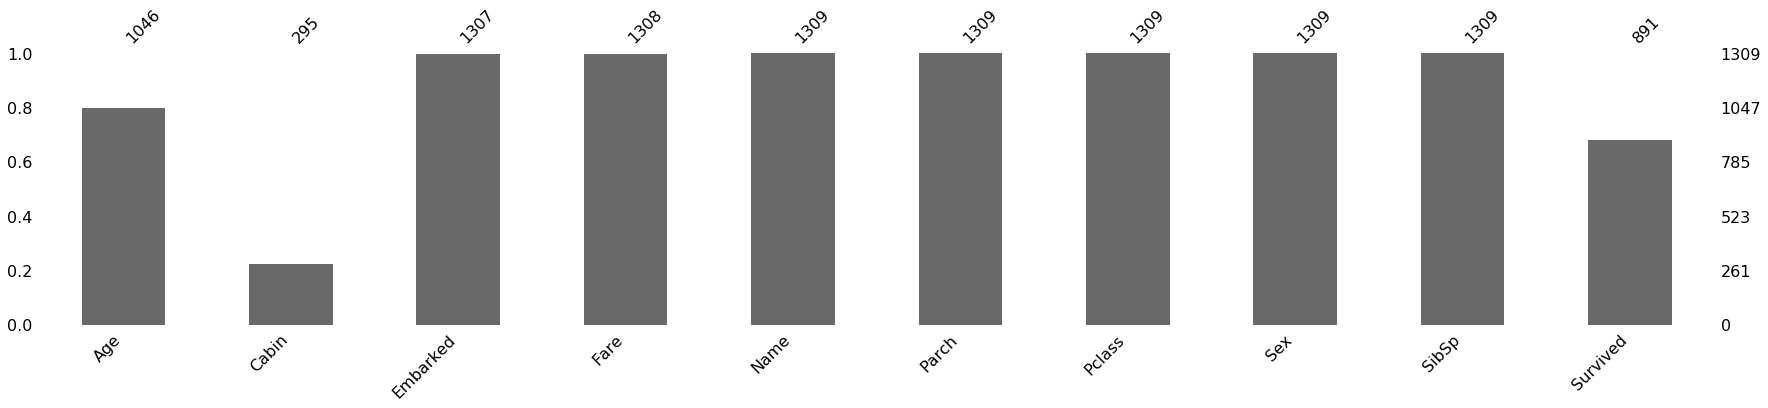

In [18]:
missingno.bar(data_full, sort='ascending', figsize = (30,5))

In [19]:
miss = data_full.isnull().sum()/len(data_full)
miss

Age         0.200917
Cabin       0.774637
Embarked    0.001528
Fare        0.000764
Name        0.000000
Parch       0.000000
Pclass      0.000000
Sex         0.000000
SibSp       0.000000
Survived    0.319328
dtype: float64

There are missing values in Age, Cabin and Embarked column. In particular, there are 77% values missing in Cabin, 20% in Age, 0.2% in Embarked and 0.07% in Fare.

#### Embarked

In [20]:
# check observations with empty embarked column
data_full[data_full["Embarked"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1.0
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1.0


We notice that the two passengers with missing Pclass are having the same ticket number and same cabin. On googling the name of the passenger, we found that she emarked from S with her maid Amelie Icard.

In [21]:
data_full["Embarked"] = data_full["Embarked"].fillna("S")

#### Age

Fare    Pclass      0.558629
Age     Pclass      0.408106
Parch   SibSp       0.373587
Pclass  Survived    0.338481
Fare    Survived    0.257307
Age     SibSp       0.243699
Fare    Parch       0.221539
Age     Fare        0.178740
Fare    SibSp       0.160238
Age     Parch       0.150917
Parch   Survived    0.081629
Age     Survived    0.077221
Pclass  SibSp       0.060832
SibSp   Survived    0.035322
Parch   Pclass      0.018322
dtype: float64


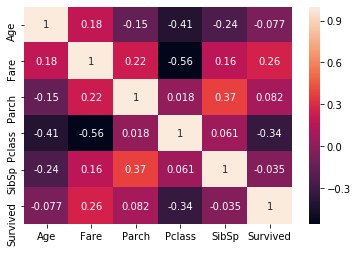

In [22]:
# check observations with empty age column
sns.heatmap(data_full_numerical.corr(),annot=True)

corr_matrix = data_full_numerical.corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
print(sol)

We will use the median age of the Pclass groups as the correlation is higher compared to others

In [31]:
age_by_pclass = data_full.groupby(["Pclass"]).median()["Age"]
age_by_pclass

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [32]:
data_full["Age"] = data_full.groupby(["Pclass"])["Age"].apply(lambda x: x.fillna(x.median()))

#### Fare

In [33]:
# check observations with empty fare column
data_full[data_full["Fare"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Deck,Room


In [34]:
median_value = data_full.groupby(["Pclass", "Parch", "SibSp"]).median()["Fare"][3][0][0]

In [35]:
med_fare = data_full.groupby(["Pclass", "Parch", "SibSp"])
data_full["Fare"] = data_full["Fare"].fillna(median_value)

#### Cabin

For the deck column we will replace the missing values wth an unused letter to represent lack of data. Similarly for room number, we will use mean.

In [36]:
data_full["Deck"] = data_full["Cabin"].str.slice(0,1)
data_full["Room"] = data_full["Cabin"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")

In [37]:
data_full

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Deck,Room
0,22.00,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,NaN,NaN
1,38.00,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,1,female,1,1.0,C,85.0
2,26.00,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,NaN,NaN
3,35.00,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,C,123.0
4,35.00,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,NaN,NaN
5,24.00,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0.0,NaN,NaN
6,54.00,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0.0,E,46.0
7,2.00,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0.0,NaN,NaN
8,27.00,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1.0,NaN,NaN
9,14.00,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female,1,1.0,NaN,NaN


In [38]:
data_full["Deck"] = data_full["Deck"].fillna("N")
data_full["Room"] = data_full["Room"].fillna(data_full["Room"].mean())

### Feature Engineering

#### Embarked

In [39]:
data_full = pd.concat([data_full, pd.get_dummies(data_full["Embarked"], prefix="Embarked")],axis=1)

#### Pclass

In [40]:
# PCLASS
Pclass_cat = []
for i in range(0,len(data_full["Pclass"])):
    if (data_full["Pclass"][i] == 1):
        Pclass_cat.append("Upper")
    elif (data_full["Pclass"][i] == 2):
        Pclass_cat.append("Middle")
    elif (data_full["Pclass"][i] ==3):
        Pclass_cat.append("Lower")
    else:
        Pclass_cat.append("Error")
        
data_full["Pclass_cat"] = Pclass_cat
data_full["Pclass_cat"].value_counts()

Lower     709
Upper     323
Middle    277
Name: Pclass_cat, dtype: int64

#### Name

In [41]:
# NAME
# we can find out if they are married or not through their name title
name_title = []
for i in range(0,len(data_full["Name"])):
    if ("Mr." in data_full["Name"][i]):
        name_title.append("Mr.")
    elif ("Ms." in data_full["Name"][i]):
        name_title.append("Ms.")
    elif ("Lady." in data_full["Name"][i]):
        name_title.append("Mrs.")
    elif ("Sir." in data_full["Name"][i]):
        name_title.append("Mr.")
    elif ("Mlle." in data_full["Name"][i]):
        name_title.append("Ms.")
    elif ("Col." in data_full["Name"][i]):
        name_title.append("Mr.")
    elif ("Capt." in data_full["Name"][i]):
        name_title.append("Mr.")
    elif ("Countess." in data_full["Name"][i]):
        name_title.append("Mrs.")
    elif ("Jonkheer." in data_full["Name"][i]):
        name_title.append("Mr.")
    elif ("Miss." in data_full["Name"][i]):
        name_title.append("Ms.")
    elif ("Mrs." in data_full["Name"][i]):
        name_title.append("Mrs.")
    elif ("Don." in data_full["Name"][i]):
        name_title.append("Mr.")
    elif ("Master." in data_full["Name"][i]):
        name_title.append("Master.")
    elif ("Rev." in data_full["Name"][i]):
        name_title.append("Rev.")
    elif ("Dr." in data_full["Name"][i]):
        name_title.append("Dr.")
    elif ("Mme." in data_full["Name"][i]):
        name_title.append("Mrs.")
    elif ("Major." in data_full["Name"][i]):
        name_title.append("Mr.")
    elif ("Dona." in data_full["Name"][i]):
        name_title.append("Mrs.")
    else:
        name_title.append("Error")
        
data_full["name_title"] = name_title

In [42]:
data_full[data_full["name_title"] == "Error"]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Deck,Room,Embarked_C,Embarked_Q,Embarked_S,Pclass_cat,name_title


In [43]:
data_full["name_title"].value_counts()

Mr.        767
Ms.        264
Mrs.       201
Master.    61 
Rev.       8  
Dr.        8  
Name: name_title, dtype: int64

#### Family Size

In [44]:
data_full = data_full.reset_index()

In [45]:
family_size = []
for i in range(0,len(data_full)):
    family_size.append(data_full["SibSp"][i] + data_full["Parch"][i])

In [46]:
# bin into alone, small, medium and large
family_size = []
for i in range(0, len(data_full)):
    if(data_full["SibSp"][i] == 0):
        family_size.append("Alone")
    elif ((data_full["SibSp"][i] > 0) and (data_full["SibSp"][i] <= 4)):
        family_size.append("Small")
    elif ((data_full["SibSp"][i] > 4) and (data_full["SibSp"][i] <= 6)):
        family_size.append("Medium")
    elif (data_full["SibSp"][i] > 6):
        family_size.append("Large")
    else:
        family_size.append("Error")
        
data_full["family_size"] = family_size

In [47]:
data_full["family_size"] = family_size

#### Married

In [48]:
married = []
for i in range(0, len(data_full)):
    if("Mrs." in data_full["Name"][i]):
        married.append("married")
    else:
        married.append("not married")

In [49]:
data_full["married"] = married

### Encode Features

#### Married

In [50]:
data_full = pd.concat([data_full, pd.get_dummies(data_full["married"], prefix="married")],axis=1)

#### Family Size

In [51]:
data_full = pd.concat([data_full, pd.get_dummies(data_full["family_size"], prefix="family")],axis=1)

#### Name Title

In [52]:
data_full = pd.concat([data_full, pd.get_dummies(data_full["name_title"], prefix="name")],axis=1)

#### Cabin

In [53]:
data_full = pd.concat([data_full, pd.get_dummies(data_full["Deck"], prefix="Deck")],axis=1)

#### Pclass

In [54]:
data_full = pd.concat([data_full, pd.get_dummies(data_full["Pclass_cat"], prefix="Pclass")],axis=1)

#### Sex

In [55]:
data_full = pd.concat([data_full, pd.get_dummies(data_full["Sex"], prefix="Sex")],axis=1)

#### Reassign train and test set

In [56]:
test = data_full[data_full["Survived"].isnull()]
train = data_full[~data_full.index.isin(test.index)]

In [57]:
train.shape

(891, 46)

In [58]:
test.shape

(418, 46)

## 4. Exploratory Data Analysis

In [59]:
train.head()

,index,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Deck,Room,Embarked_C,Embarked_Q,Embarked_S,Pclass_cat,name_title,family_size,married,married_married,married_not married,family_Alone,family_Large,family_Medium,family_Small,name_Dr.,name_Master.,name_Mr.,name_Mrs.,name_Ms.,name_Rev.,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T,Pclass_Lower,Pclass_Middle,Pclass_Upper,Sex_female,Sex_male
0,0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,N,49.615917,0,0,1,Lower,Mr.,Small,not married,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
1,1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,1,female,1,1.0,C,85.000000,1,0,0,Upper,Mrs.,Small,married,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
2,2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,N,49.615917,0,0,1,Lower,Ms.,Alone,not married,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
3,3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,C,123.000000,0,0,1,Upper,Mrs.,Small,married,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
4,4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,N,49.615917,0,0,1,Lower,Mr.,Alone,not married,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1


### Correlation

Sex_female           Sex_male               1.000000
married_married      married_not married    1.000000
married_not married  name_Mrs.              0.986275
married_married      name_Mrs.              0.986275
family_Alone         family_Small           0.969053
Pclass               Pclass_Lower           0.916673
                     Pclass_Upper           0.885924
name_Mr.             Sex_male               0.883519
                     Sex_female             0.883519
Deck_N               Pclass_Upper           0.788773
Embarked_C           Embarked_S             0.782742
Pclass               Deck_N                 0.725541
SibSp                family_Alone           0.695562
name_Ms.             Sex_male               0.693916
                     Sex_female             0.693916
Pclass_Lower         Pclass_Upper           0.626738
name_Mr.             name_Ms.               0.613088
SibSp                family_Large           0.603697
Fare                 Pclass_Upper           0.

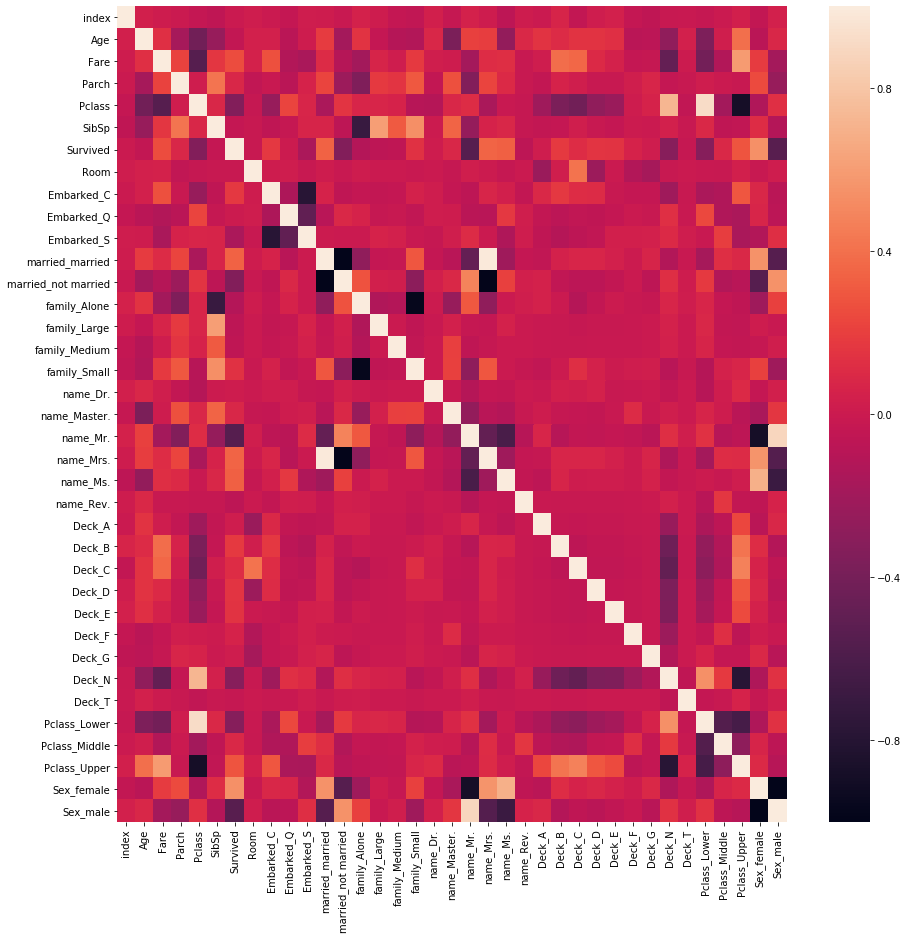

In [60]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr())

corr_matrix = train.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
print(sol)

### Feature: Survived

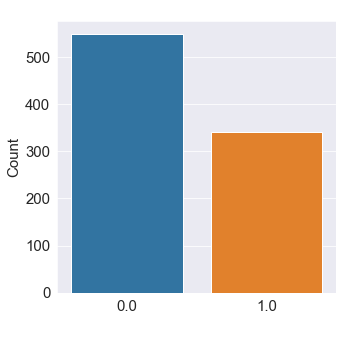

In [61]:
# how many survived?
plt.figure(figsize=(5,5))
sns.set_style("darkgrid")
b = sns.countplot(x="Survived", data=train)
b.axes.set_title("Title",fontsize=10)
b.set_xlabel("X Label",fontsize=15)
b.set_ylabel("Y Label",fontsize=15)
b.tick_params(labelsize=15)
plt.title(" ")
plt.ylabel("Count")
plt.xlabel(" ")
plt.show()

In [62]:
print("There were {} who survived and {} who did not".format(train["Survived"].value_counts()[1], train["Survived"].value_counts()[0]))

There were 342 who survived and 549 who did not


### Feature: Pclass

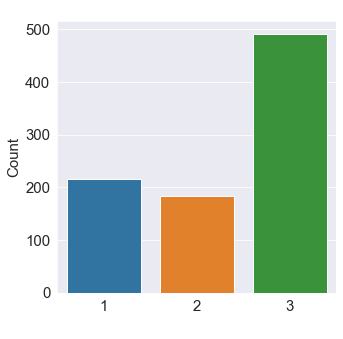

In [63]:
# breakdown of ticket class
plt.figure(figsize=(5,5))
sns.set_style("darkgrid")
b = sns.countplot(x="Pclass", data=train)
b.axes.set_title("Title",fontsize=10)
b.set_xlabel("X Label",fontsize=15)
b.set_ylabel("Y Label",fontsize=15)
b.tick_params(labelsize=15)
plt.title(" ")
plt.ylabel("Count")
plt.xlabel(" ")
plt.show()

In [64]:
# percentage of Pclass=1 (Upper)
print(train["Pclass"].value_counts().sort_index()[1]/len(train)*100)

# percentage of Pclass=2 (Middle)
print(train["Pclass"].value_counts().sort_index()[2]/len(train)*100)

# percentage of Pclass=3 (Lower)
print(train["Pclass"].value_counts().sort_index()[3]/len(train)*100)

24.242424242424242
20.65095398428732
55.106621773288445


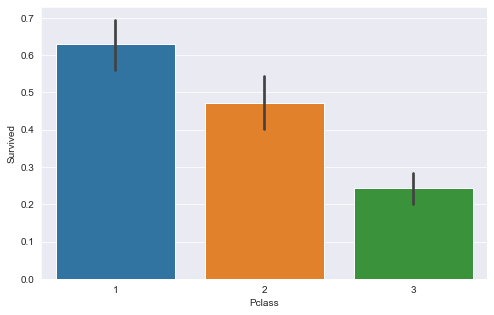

In [65]:
# how many survived?
plt.figure(figsize=(8,5))
sns.barplot(x="Pclass",y="Survived",data=train)
plt.show()

Around 60% of the Upper class passengers survived. The chances of survival for upper class is the highest while lowest for loweer class.

### Feature: Name

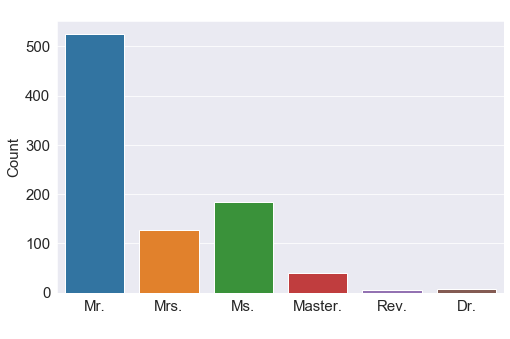

In [66]:
# breakdown of anme title
plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
b = sns.countplot(x="name_title", data=train)
b.axes.set_title("Title",fontsize=10)
b.set_xlabel("X Label",fontsize=15)
b.set_ylabel("Y Label",fontsize=15)
b.tick_params(labelsize=15)
plt.title(" ")
plt.ylabel("Count")
plt.xlabel(" ")
plt.show()

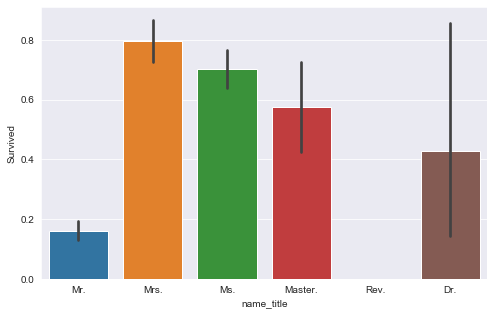

In [67]:
# how many survived?
plt.figure(figsize=(8,5))
sns.barplot(x="name_title",y="Survived",data=train)
plt.show()

### Feature: Married

In [68]:
pd.crosstab(train.married, train.Survived, margins=True)

Survived,0.0,1.0,All
married,,,
married,26,99,125
not married,523,243,766
All,549,342,891


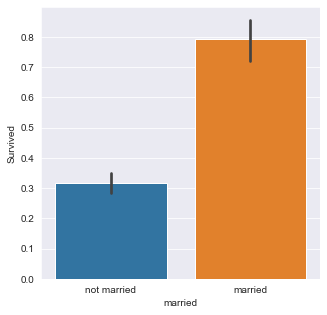

In [69]:
plt.figure(figsize=(5,5))
sns.barplot(x="married",y="Survived",data=train)
plt.show()

### Feature: Sex

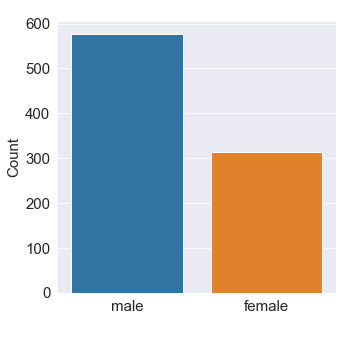

In [70]:
# how many males and females were there?
plt.figure(figsize=(5,5))
sns.set_style("darkgrid")
b = sns.countplot(x="Sex", data=train)
b.axes.set_title("Title",fontsize=10)
b.set_xlabel("X Label",fontsize=15)
b.set_ylabel("Y Label",fontsize=15)
b.tick_params(labelsize=15)
plt.title(" ")
plt.ylabel("Count")
plt.xlabel(" ")
plt.show()

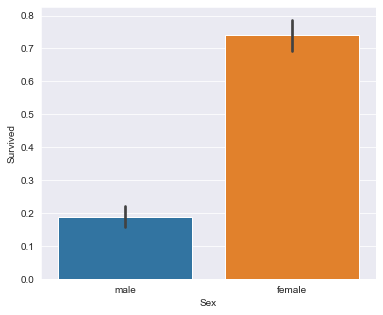

In [71]:
# how many survived?
plt.figure(figsize=(6,5))
sns.barplot(x="Sex",y="Survived",data=train)
plt.show()

### Feature: Age

In [72]:
train["Age"].describe()

count    891.000000
mean     29.133749 
std      13.289756 
min      0.420000  
25%      22.000000 
50%      26.000000 
75%      37.000000 
max      80.000000 
Name: Age, dtype: float64

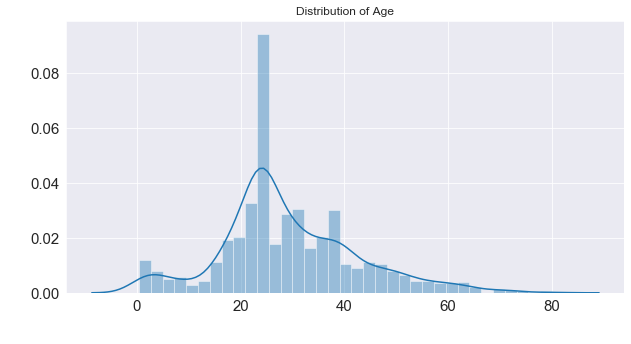

In [73]:
# what is the distribution of age?
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
b = sns.distplot(train["Age"],kde=True,bins=35)
b.axes.set_title("Title",fontsize=30)
b.set_xlabel("X Label",fontsize=20)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=15)
plt.title("Distribution of Age")
plt.ylabel(" ")
plt.xlabel(" ")
plt.show()

In [74]:
# skewness
print("The skewness of age is {}".format(train["Age"].skew()))

The skewness of age is 0.5343632148246276


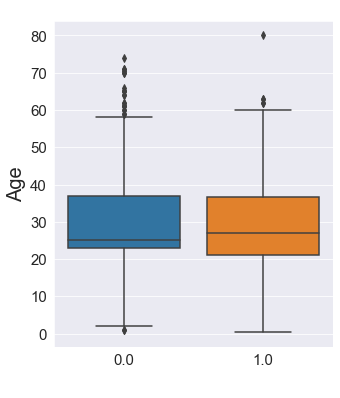

In [75]:
# breakdown of survival status according to age
plt.figure(figsize=(5,6))
sns.set_style("darkgrid")
b = sns.boxplot(x="Survived", y="Age", data=train)
b.axes.set_title("Title",fontsize=30)
b.set_xlabel("X Label",fontsize=20)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=15)
plt.title(" ")
plt.ylabel("Age")
plt.xlabel(" ")
plt.show()

In [76]:
# we try to bin the age
train["age_bin"] = pd.cut(train["Age"], 4, labels=["Below 20", "Below 40", "Below 60", "Below 80"])
test["age_bin"] = pd.cut(test["Age"], 4, labels=["Below 20", "Below 40", "Below 60", "Below 80"]) 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [77]:
train = pd.concat([train, pd.get_dummies(train["age_bin"], prefix="age")],axis=1)
test = pd.concat([test, pd.get_dummies(test["age_bin"], prefix="age")],axis=1)

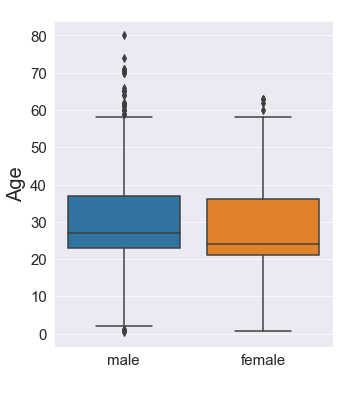

In [78]:
# whats the age by Age?
plt.figure(figsize=(5,6))
sns.set_style("darkgrid")
b = sns.boxplot(x="Sex", y="Age", data=train)
b.axes.set_title("Title",fontsize=30)
b.set_xlabel("X Label",fontsize=20)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=15)
plt.title(" ")
plt.ylabel("Age")
plt.xlabel(" ")
plt.show()

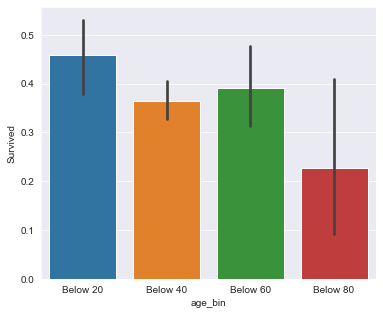

In [79]:
# which age group have a better chance of survival?
plt.figure(figsize=(6,5))
sns.barplot(x="age_bin",y="Survived",data=train)
plt.show()

### Feature: SipSp (Number of siblings/spouses on board)

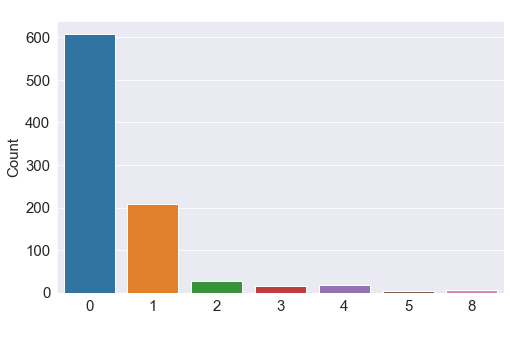

In [80]:
# number of siblings on board
plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
b = sns.countplot(x="SibSp", data=train)
b.axes.set_title("Title",fontsize=10)
b.set_xlabel("X Label",fontsize=15)
b.set_ylabel("Y Label",fontsize=15)
b.tick_params(labelsize=15)
plt.title(" ")
plt.ylabel("Count")
plt.xlabel(" ")
plt.show()

In [81]:
train["SibSp"].value_counts().sort_index()

0    608
1    209
2    28 
3    16 
4    18 
5    5  
8    7  
Name: SibSp, dtype: int64

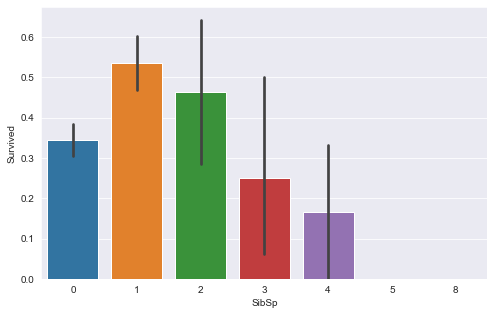

In [82]:
# more siblings/spouse on board lesser chance of survival?
plt.figure(figsize=(8,5))
sns.barplot(x="SibSp",y="Survived",data=train)
plt.show()

### Feature: Parch (Number of parents/children on board)

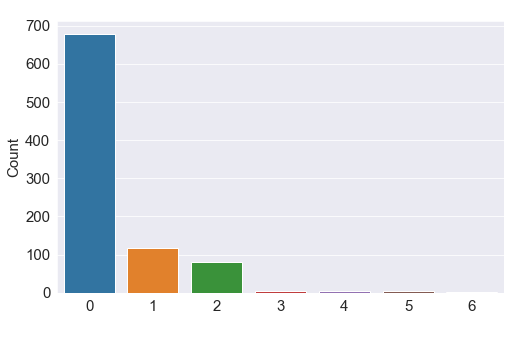

In [83]:
# number of parents/children
plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
b = sns.countplot(x="Parch", data=train)
b.axes.set_title("Title",fontsize=10)
b.set_xlabel("X Label",fontsize=15)
b.set_ylabel("Y Label",fontsize=15)
b.tick_params(labelsize=15)
plt.title(" ")
plt.ylabel("Count")
plt.xlabel(" ")
plt.show()

In [84]:
train["Parch"].value_counts().sort_index()

0    678
1    118
2    80 
3    5  
4    4  
5    5  
6    1  
Name: Parch, dtype: int64

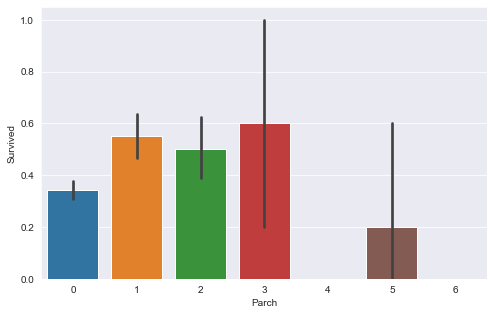

In [85]:
# more siblings/spouse on board lesser chance of survival?
plt.figure(figsize=(8,5))
sns.barplot(x="Parch",y="Survived",data=train)
plt.show()

### Family Size

In [86]:
pd.crosstab(train.family_size, train.Survived, margins=True)

Survived,0.0,1.0,All
family_size,,,
Alone,398,210,608
Large,7,0,7
Medium,5,0,5
Small,139,132,271
All,549,342,891


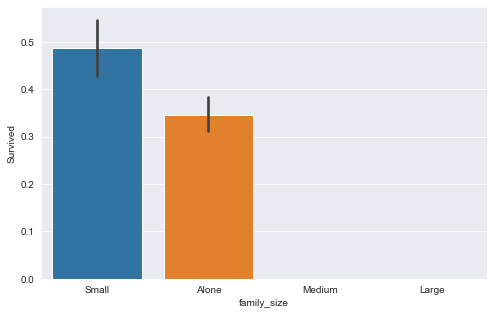

In [87]:
plt.figure(figsize=(8,5))
sns.barplot(x="family_size",y="Survived",data=train)
plt.show()

### Feature: Fare

In [88]:
# summary statistics of fare
train["Fare"].describe()

count    891.000000
mean     32.204208 
std      49.693429 
min      0.000000  
25%      7.910400  
50%      14.454200 
75%      31.000000 
max      512.329200
Name: Fare, dtype: float64

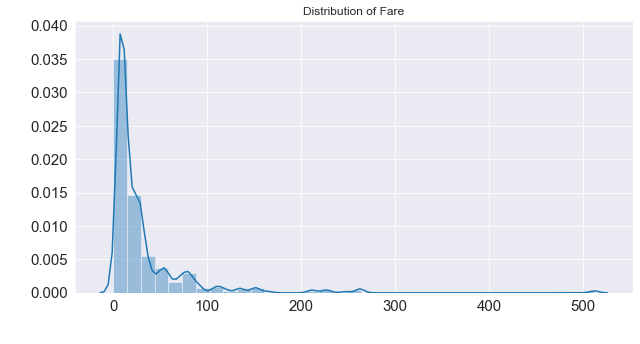

In [89]:
# what is the distribution of fare?
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
b = sns.distplot(train["Fare"],kde=True,bins=35)
b.axes.set_title("Title",fontsize=30)
b.set_xlabel("X Label",fontsize=20)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=15)
plt.title("Distribution of Fare")
plt.ylabel(" ")
plt.xlabel(" ")
plt.show()

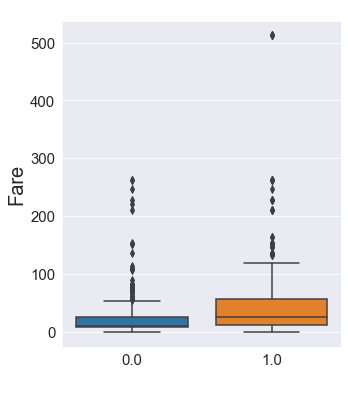

In [90]:
# Does higher fare equate to higher chance of survival?
plt.figure(figsize=(5,6))
sns.set_style("darkgrid")
b = sns.boxplot(x="Survived", y="Fare", data=train)
b.axes.set_title("Title",fontsize=30)
b.set_xlabel("X Label",fontsize=20)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=15)
plt.title(" ")
plt.ylabel("Fare")
plt.xlabel(" ")
plt.show()

In [91]:
# remove outlier
train = train.drop(train[train["Fare"] > 500].index)

In [92]:
train.groupby("Deck")["Fare"].median()

Deck
A    35.50000
B    79.20000
C    83.47500
D    53.10000
E    45.18125
F    13.00000
G    13.58125
N    10.50000
T    35.50000
Name: Fare, dtype: float64

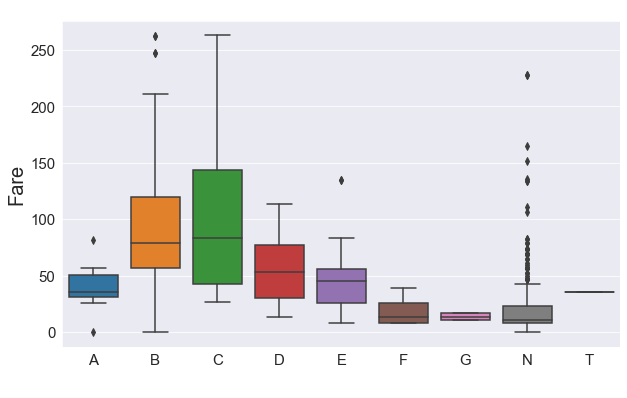

In [93]:
# which cabin has a higher fare?
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
b = sns.boxplot(x="Deck", y="Fare", data=train, order=train.groupby("Deck")["Fare"].median().index)
b.axes.set_title("Title",fontsize=30)
b.set_xlabel("X Label",fontsize=20)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=15)
plt.title(" ")
plt.ylabel("Fare")
plt.xlabel(" ")
plt.show()

In [94]:
# binning fare
train["fare_bin"] = pd.cut(train["Fare"], 5, labels=["Below 50", "Below 100", "Below 150", "Below 210", "Below 260"])
test["fare_bin"] = pd.cut(test["Fare"], 5, labels=["Below 50", "Below 100", "Below 150", "Below 210", "Below 260"])

In [95]:
train = pd.concat([train, pd.get_dummies(train["fare_bin"], prefix="fare")],axis=1)
test = pd.concat([test, pd.get_dummies(test["fare_bin"], prefix="fare")],axis=1)

In [96]:
train["fare_bin"].value_counts()

Below 50     745
Below 100    93 
Below 150    31 
Below 260    17 
Below 210    2  
Name: fare_bin, dtype: int64

In [97]:
deck_fare = pd.crosstab(train["Deck"], train["fare_bin"])

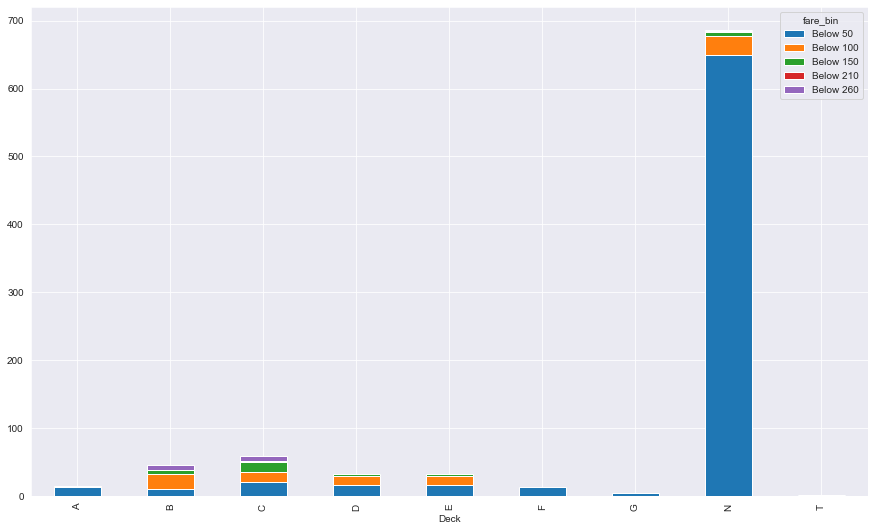

In [98]:
plt.rcParams["figure.figsize"] = [15,9]
deck_fare.plot.bar(stacked=True)

### Feature: Cabin

In [99]:
train.groupby(["Deck", "Pclass"])["Pclass"].count()

Deck  Pclass
A     1         15 
B     1         45 
C     1         59 
D     1         29 
      2         4  
E     1         25 
      2         4  
      3         3  
F     2         8  
      3         5  
G     3         4  
N     1         39 
      2         168
      3         479
T     1         1  
Name: Pclass, dtype: int64

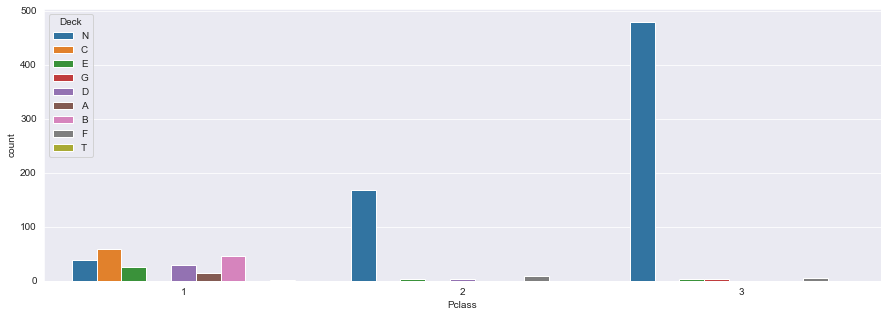

In [100]:
plt.figure(figsize=(15,5))
sns.countplot(x="Pclass", hue="Deck", data=train)

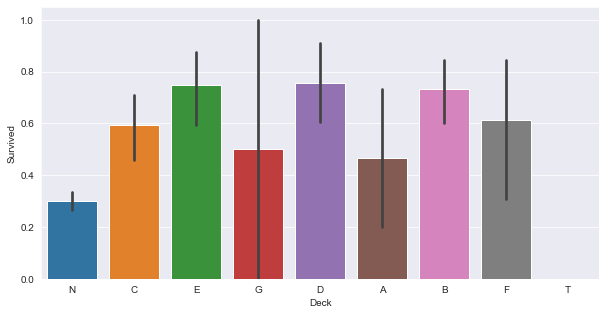

In [101]:
# does cabin A,B,C (usually occupied by upper class) have higher chance of survival?
plt.figure(figsize=(10,5))
sns.barplot(x="Deck",y="Survived",data=train)
plt.show()

### Feature: Embarked

In [102]:
train["Embarked"].value_counts()

S    646
C    165
Q    77 
Name: Embarked, dtype: int64

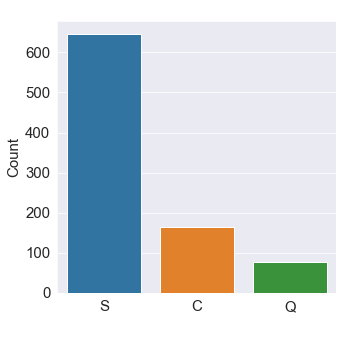

In [103]:
# embarked
plt.figure(figsize=(5,5))
sns.set_style("darkgrid")
b = sns.countplot(x="Embarked", data=train)
b.axes.set_title("Title",fontsize=10)
b.set_xlabel("X Label",fontsize=15)
b.set_ylabel("Y Label",fontsize=15)
b.tick_params(labelsize=15)
plt.title(" ")
plt.ylabel("Count")
plt.xlabel(" ")
plt.show()

Passengers who boarded from Southampton has a lower survival rate. More than half of the passengers boarded from Cherbourg survived.

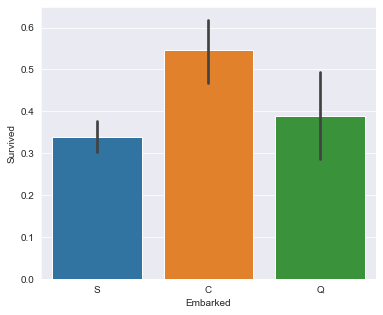

In [104]:
# how many survived?
plt.figure(figsize=(6,5))
sns.barplot(x="Embarked",y="Survived",data=train)
plt.show()

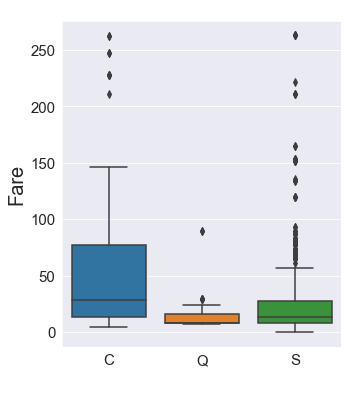

In [105]:
# fare comparison with the embark location
plt.figure(figsize=(5,6))
sns.set_style("darkgrid")
b = sns.boxplot(x="Embarked", y="Fare", data=train, order=train.groupby("Embarked")["Fare"].median().index)
b.axes.set_title("Title",fontsize=30)
b.set_xlabel("X Label",fontsize=20)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=15)
plt.title(" ")
plt.ylabel("Fare")
plt.xlabel(" ")
plt.show()

## 5. Modelling

#### Dropping unused columns

In [106]:
train = train.drop(["index", "Cabin", "Embarked", "Name", "Parch", "Pclass", "Sex", "SibSp", "Deck", "Room", "Pclass_cat",
               "name_title", "married", "family_size","age_bin", "fare_bin","Age","Fare"],axis=1)

In [107]:
test = test.drop(["index", "Cabin", "Embarked", "Name", "Parch", "Pclass", "Sex", "SibSp", "Deck", "Room", "Pclass_cat",
               "name_title", "married", "family_size","age_bin", "fare_bin","Age","Fare"],axis=1)

#### Split into training and testing set

In [108]:
test = test.drop("Survived",axis=1)

In [109]:
test.shape

(418, 38)

In [110]:
train.shape

(888, 39)

In [111]:
test.columns

Index(['Embarked_C', 'Embarked_Q', 'Embarked_S', 'married_married',
       'married_not married', 'family_Alone', 'family_Large', 'family_Medium',
       'family_Small', 'name_Dr.', 'name_Master.', 'name_Mr.', 'name_Mrs.',
       'name_Ms.', 'name_Rev.', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_N', 'Deck_T', 'Pclass_Lower',
       'Pclass_Middle', 'Pclass_Upper', 'Sex_female', 'Sex_male',
       'age_Below 20', 'age_Below 40', 'age_Below 60', 'age_Below 80',
       'fare_Below 50', 'fare_Below 100', 'fare_Below 150', 'fare_Below 210',
       'fare_Below 260'],
      dtype='object')

In [112]:
train.columns

Index(['Survived', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'married_married',
       'married_not married', 'family_Alone', 'family_Large', 'family_Medium',
       'family_Small', 'name_Dr.', 'name_Master.', 'name_Mr.', 'name_Mrs.',
       'name_Ms.', 'name_Rev.', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_N', 'Deck_T', 'Pclass_Lower',
       'Pclass_Middle', 'Pclass_Upper', 'Sex_female', 'Sex_male',
       'age_Below 20', 'age_Below 40', 'age_Below 60', 'age_Below 80',
       'fare_Below 50', 'fare_Below 100', 'fare_Below 150', 'fare_Below 210',
       'fare_Below 260'],
      dtype='object')

In [113]:
y = train["Survived"]

In [114]:
X = train.loc[:, ['Embarked_C', 'Embarked_Q', 'Embarked_S', 'married_married',
       'married_not married', 'family_Alone', 'family_Large', 'family_Medium',
       'family_Small', 'name_Dr.', 'name_Master.', 'name_Mr.', 'name_Mrs.',
       'name_Ms.', 'name_Rev.', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_N', 'Deck_T', 'Pclass_Lower',
       'Pclass_Middle', 'Pclass_Upper', 'Sex_female', 'Sex_male',
       'age_Below 20', 'age_Below 40', 'age_Below 60', 'age_Below 80',
       'fare_Below 50', 'fare_Below 100', 'fare_Below 150', 'fare_Below 210',
       'fare_Below 260']]

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

In [116]:
X_train.shape

(710, 38)

In [117]:
X_test.shape

(178, 38)

In [118]:
y_train.shape

(710,)

In [119]:
y_test.shape

(178,)

#### Standardizing

In [120]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

### Define Machine Learning Fitting Function

In [121]:
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # Fit
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier,
                          GaussianNB, 
                          CatBoostClassifier,
                          DecisionTreeClassifier,
                          RandomForestClassifier, 
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test)*100, 2)
    
    # CV
    train_pred = model_selection.cross_val_predict(algo, X_train, y_train, cv=cv, n_jobs=-1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred)*100, 2)
    
    return model, train_pred, test_pred, acc, acc_cv, probs

### Define ROC Curve Function

In [122]:
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title("Receiver Operating Characterstic")
    plt.plot(fpr, tpr, "b", label="AUC = %0.2f" % roc_auc)
    plt.legend(loc = "lower right")
    plt.plot([0, 1], [0, 1], "r--")
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    plt.show()

### Logistic Regression

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 76.97
Accuracy CV 10 Fold: 81.69
Running Time: 0:00:04.159722
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86       448
         1.0       0.76      0.73      0.75       262

    accuracy                           0.82       710
   macro avg       0.80      0.80      0.80       710
weighted avg       0.82      0.82      0.82       710

              precision    recall  f1-score   support

         0.0       0.78      0.83      0.80       101
         1.0       0.76      0.69      0.72        77

    accuracy                           0.77       178
   macro avg       0.77      0.76      0.76       178
weighted avg       0.77      0.77      0.77       178



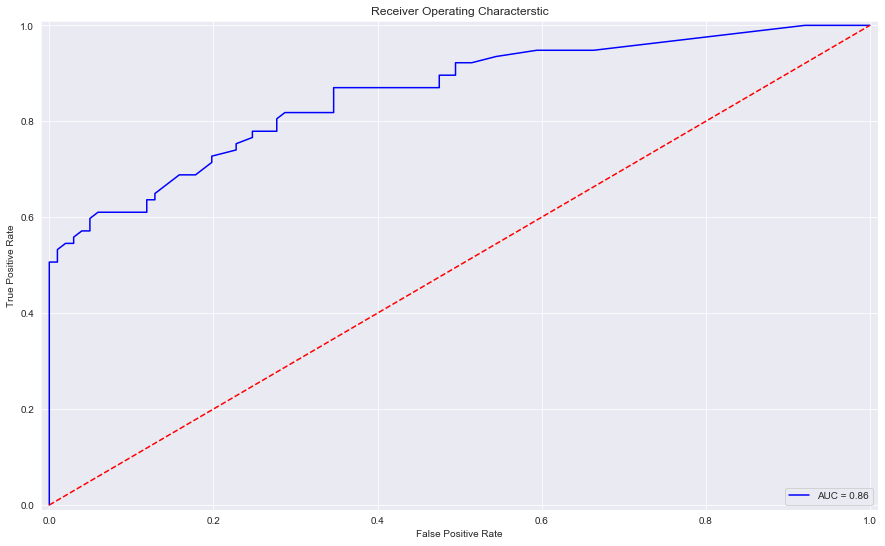

In [123]:
start_time = time.time()
model_log, train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(), X_train, y_train, X_test, 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10 Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))
print(metrics.classification_report(y_train, train_pred_log))
print(metrics.classification_report(y_test, test_pred_log))
plot_roc_curve(y_test, probs_log)

### K-Nearest Neighbours

Accuracy: 81.46
Accuracy CV 10 Fold: 78.87
Running Time: 0:00:00.901514
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84       448
         1.0       0.73      0.68      0.70       262

    accuracy                           0.79       710
   macro avg       0.77      0.77      0.77       710
weighted avg       0.79      0.79      0.79       710

              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85       101
         1.0       0.84      0.70      0.77        77

    accuracy                           0.81       178
   macro avg       0.82      0.80      0.81       178
weighted avg       0.82      0.81      0.81       178



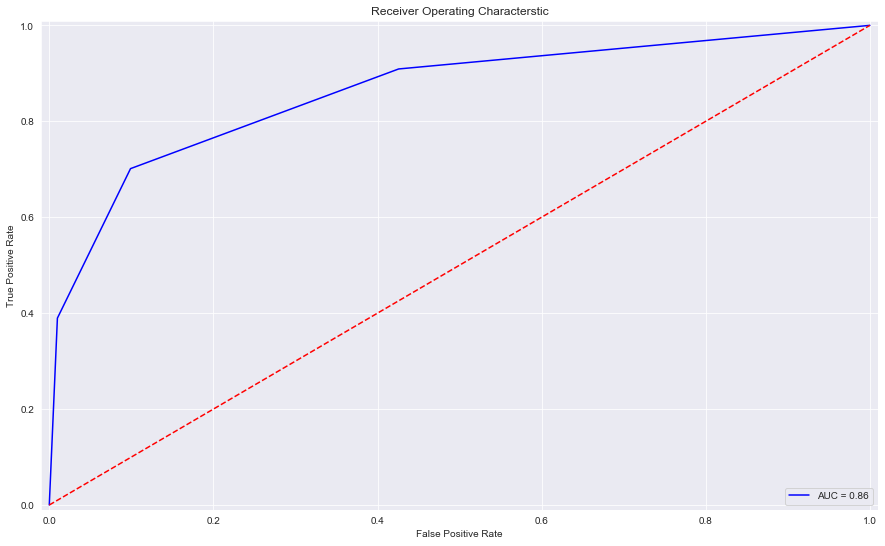

In [124]:
start_time = time.time()
model_knn, train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3, n_jobs=-1), 
                                                                            X_train, y_train, X_test, 10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10 Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))
print(metrics.classification_report(y_train, train_pred_knn))
print(metrics.classification_report(y_test, test_pred_knn))
plot_roc_curve(y_test, probs_knn)

### Gaussian Naive Bayes

Accuracy: 46.07
Accuracy CV 10 Fold: 39.44
Running Time: 0:00:00.087211
              precision    recall  f1-score   support

         0.0       0.78      0.06      0.10       448
         1.0       0.38      0.97      0.54       262

    accuracy                           0.39       710
   macro avg       0.58      0.51      0.32       710
weighted avg       0.63      0.39      0.27       710

              precision    recall  f1-score   support

         0.0       1.00      0.05      0.09       101
         1.0       0.45      1.00      0.62        77

    accuracy                           0.46       178
   macro avg       0.72      0.52      0.36       178
weighted avg       0.76      0.46      0.32       178



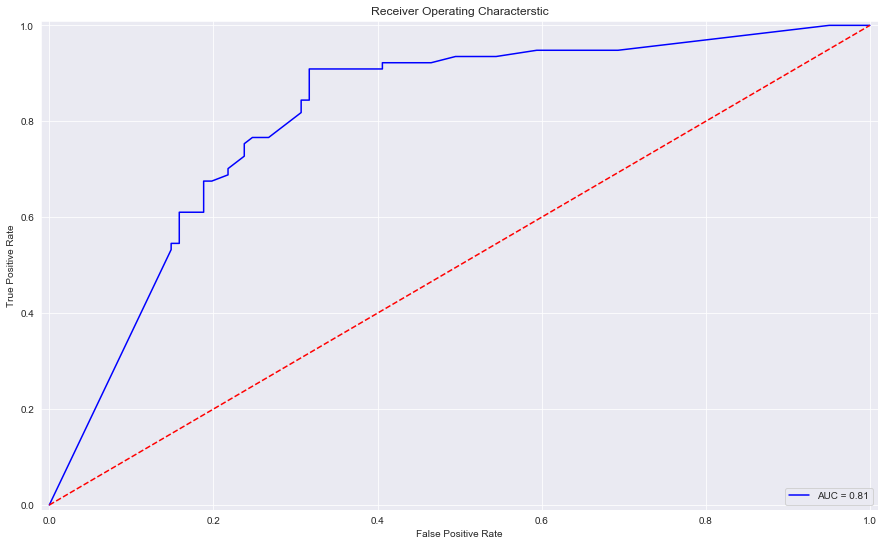

In [125]:
start_time = time.time()
model_guassian, train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gaussian = fit_ml_algo(GaussianNB(), X_train, y_train, X_test,10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10 Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))
print(metrics.classification_report(y_train, train_pred_gaussian))
print(metrics.classification_report(y_test, test_pred_gaussian))
plot_roc_curve(y_test, probs_gaussian)

### Linear Support Vector Machines (SVC)

In [126]:
start_time = time.time()
model_svc, train_pred_svc, test_pred_svc, acc_linear_svc, acc_cv_linear_svc, probs_svc = fit_ml_algo(LinearSVC(), X_train, y_train, X_test, 10)
svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10 Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=svc_time))
print(metrics.classification_report(y_train, train_pred_svc))
print(metrics.classification_report(y_test, test_pred_svc))

Accuracy: 74.72
Accuracy CV 10 Fold: 80.0
Running Time: 0:00:00.180167
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84       448
         1.0       0.72      0.75      0.73       262

    accuracy                           0.80       710
   macro avg       0.78      0.79      0.79       710
weighted avg       0.80      0.80      0.80       710

              precision    recall  f1-score   support

         0.0       0.78      0.77      0.78       101
         1.0       0.71      0.71      0.71        77

    accuracy                           0.75       178
   macro avg       0.74      0.74      0.74       178
weighted avg       0.75      0.75      0.75       178



### Stochastic Gradient Descent

In [127]:
start_time = time.time()
model_sgd, train_pred_sgd, test_pred_sgd, acc_linear_sgd, acc_cv_sgd, probs_sgd = fit_ml_algo(SGDClassifier(), X_train, y_train, X_test, 10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_sgd)
print("Accuracy CV 10 Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))
print(metrics.classification_report(y_train, train_pred_sgd))
print(metrics.classification_report(y_test, test_pred_sgd))

Accuracy: 75.28
Accuracy CV 10 Fold: 74.51
Running Time: 0:00:00.112254
              precision    recall  f1-score   support

         0.0       0.82      0.76      0.79       448
         1.0       0.64      0.72      0.68       262

    accuracy                           0.75       710
   macro avg       0.73      0.74      0.73       710
weighted avg       0.75      0.75      0.75       710

              precision    recall  f1-score   support

         0.0       0.81      0.74      0.77       101
         1.0       0.69      0.77      0.73        77

    accuracy                           0.75       178
   macro avg       0.75      0.75      0.75       178
weighted avg       0.76      0.75      0.75       178



### Decision Tree Classifier

Accuracy: 79.21
Accuracy CV 10 Fold: 79.58
Running Time: 0:00:00.086162
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       448
         1.0       0.73      0.70      0.72       262

    accuracy                           0.80       710
   macro avg       0.78      0.78      0.78       710
weighted avg       0.79      0.80      0.79       710

              precision    recall  f1-score   support

         0.0       0.77      0.91      0.83       101
         1.0       0.84      0.64      0.73        77

    accuracy                           0.79       178
   macro avg       0.81      0.77      0.78       178
weighted avg       0.80      0.79      0.79       178



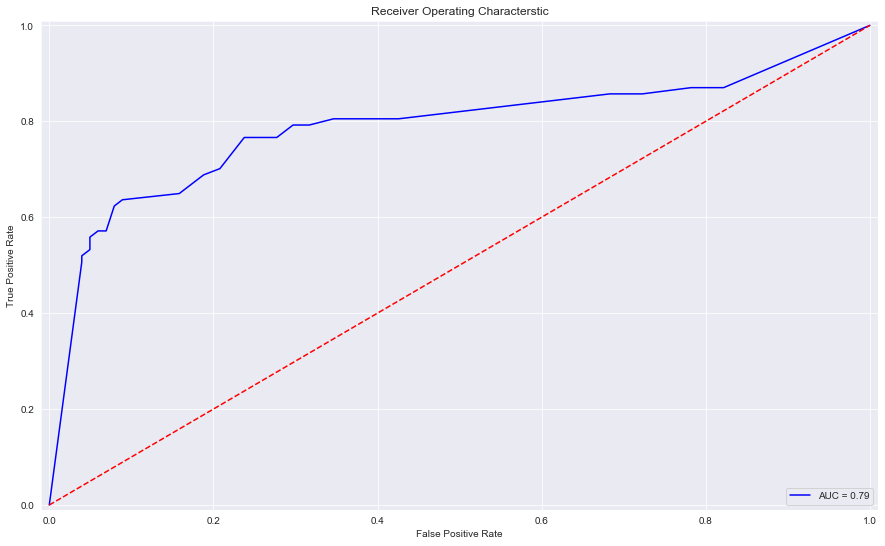

In [128]:
start_time = time.time()
model_dt, train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt = fit_ml_algo(DecisionTreeClassifier(), X_train, y_train, X_test, 10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10 Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))
print(metrics.classification_report(y_train, train_pred_dt))
print(metrics.classification_report(y_test, test_pred_dt))
plot_roc_curve(y_test, probs_dt)

### Random Forest

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 79.78
Accuracy CV 10 Fold: 79.86
Running Time: 0:00:00.231801
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       448
         1.0       0.74      0.70      0.72       262

    accuracy                           0.80       710
   macro avg       0.78      0.78      0.78       710
weighted avg       0.80      0.80      0.80       710

              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83       101
         1.0       0.83      0.68      0.74        77

    accuracy                           0.80       178
   macro avg       0.80      0.78      0.79       178
weighted avg       0.80      0.80      0.79       178



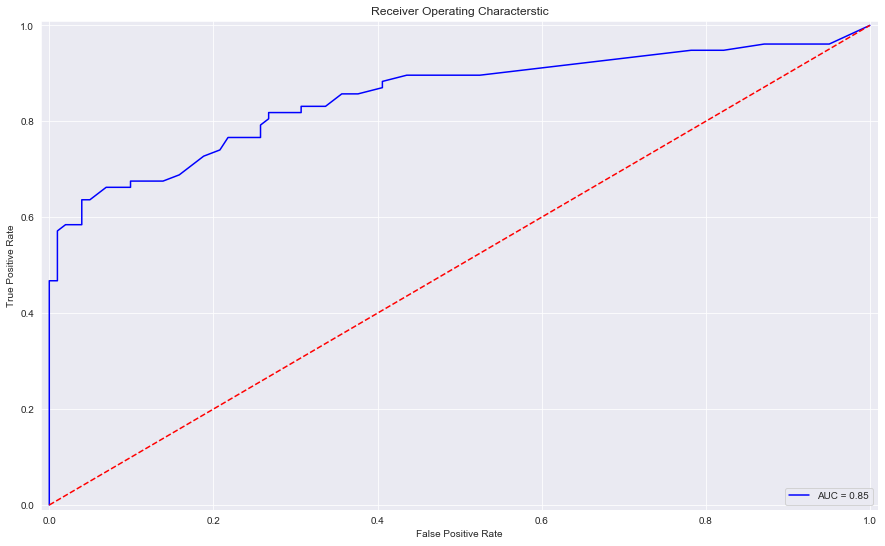

In [129]:
start_time = time.time()
model_rf, train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(RandomForestClassifier(), X_train, y_train, X_test, 10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10 Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))
print(metrics.classification_report(y_train, train_pred_rf))
print(metrics.classification_report(y_test, test_pred_rf))
plot_roc_curve(y_test, probs_rf)

### Gradient Boost Trees

Accuracy: 82.02
Accuracy CV 10 Fold: 81.69
Running Time: 0:00:00.848311
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       448
         1.0       0.80      0.68      0.73       262

    accuracy                           0.82       710
   macro avg       0.81      0.79      0.80       710
weighted avg       0.82      0.82      0.81       710

              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85       101
         1.0       0.88      0.68      0.76        77

    accuracy                           0.82       178
   macro avg       0.84      0.80      0.81       178
weighted avg       0.83      0.82      0.82       178



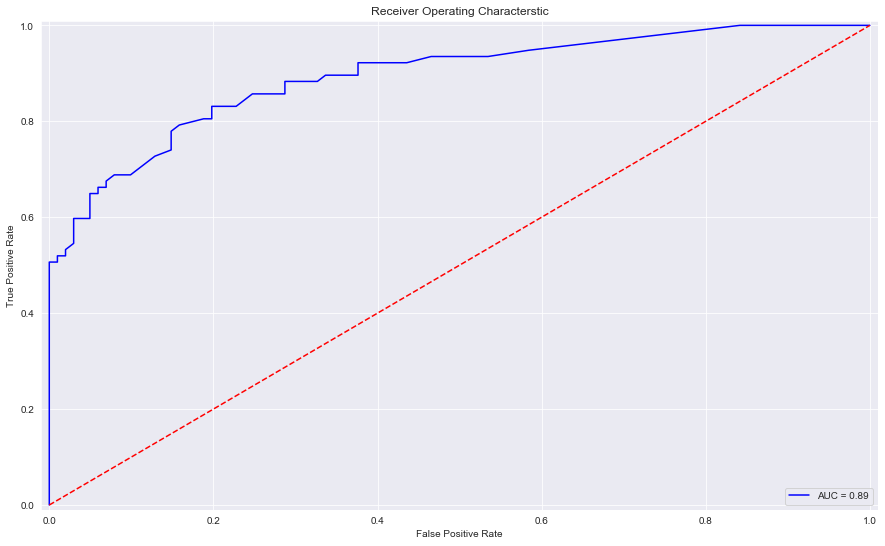

In [130]:
start_time = time.time()
model_gbt, train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt = fit_ml_algo(GradientBoostingClassifier(), X_train, y_train, X_test, 10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10 Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))
print(metrics.classification_report(y_train, train_pred_gbt))
print(metrics.classification_report(y_test, test_pred_gbt))
plot_roc_curve(y_test, probs_gbt)

### AdaBoost (Adaptive Boosting)

In [131]:
start_time = time.time()
model_adaboost, train_pred_adaboost, test_pred_adaboost, acc_adaboost, acc_cv_adaboost, probs_adaboost = fit_ml_algo(AdaBoostClassifier(), X_train, y_train, X_test, 10)
adaboost_time = (time.time() - start_time)
print("Accuracy: %s" % acc_adaboost)
print("Accuracy CV 10 Fold: %s" % acc_cv_adaboost)
print("Running Time: %s" % datetime.timedelta(seconds=adaboost_time))
print(metrics.classification_report(y_train, train_pred_adaboost))
print(metrics.classification_report(y_test, test_pred_adaboost))

Accuracy: 75.28
Accuracy CV 10 Fold: 80.14
Running Time: 0:00:00.620017
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84       448
         1.0       0.72      0.77      0.74       262

    accuracy                           0.80       710
   macro avg       0.79      0.79      0.79       710
weighted avg       0.81      0.80      0.80       710

              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78       101
         1.0       0.71      0.73      0.72        77

    accuracy                           0.75       178
   macro avg       0.75      0.75      0.75       178
weighted avg       0.75      0.75      0.75       178



## 6. Evaluation

In [137]:
models = pd.DataFrame({'Model': ["Logistic Regression", "KNN", "Gaussian Naive Bayes", "Linear SVC", 
                                "Stochastic Gradient Descent", "Decision Tree Classifier", "Random Forest",
                                "Gradient Boost Tree", "AdaBoost"],
                      'Score': [
                          acc_log,
                          acc_knn,
                          acc_gaussian,
                          acc_linear_svc,
                          acc_linear_sgd,
                          acc_dt,
                          acc_rf,
                          acc_gbt,
                          acc_adaboost
                      ]})

In [138]:
models.sort_values(by="Score", ascending=False)

,Model,Score
7,Gradient Boost Tree,82.02
1,KNN,81.46
6,Random Forest,79.78
5,Decision Tree Classifier,79.21
0,Logistic Regression,76.97
4,Stochastic Gradient Descent,75.28
8,AdaBoost,75.28
3,Linear SVC,74.72
2,Gaussian Naive Bayes,46.07


In [139]:
cv_models = pd.DataFrame({'Model': ["Logistic Regression", "KNN", "Gaussian Naive Bayes", "Linear SVC", 
                                "Stochastic Gradient Descent", "Decision Tree Classifier", "Random Forest",
                                "Gradient Boost Tree", "AdaBoost"],
                      'Score': [
                          acc_cv_log,
                          acc_cv_knn,
                          acc_cv_gaussian,
                          acc_cv_linear_svc,
                          acc_cv_sgd,
                          acc_cv_dt,
                          acc_cv_rf,
                          acc_cv_gbt,
                          acc_cv_adaboost
                      ]})

In [140]:
cv_models.sort_values(by="Score", ascending=False)

,Model,Score
0,Logistic Regression,81.69
7,Gradient Boost Tree,81.69
8,AdaBoost,80.14
3,Linear SVC,80.00
6,Random Forest,79.86
5,Decision Tree Classifier,79.58
1,KNN,78.87
4,Stochastic Gradient Descent,74.51
2,Gaussian Naive Bayes,39.44


## 7. Model Ensemble

Our top 3 performing models are CatBoost, Gradient Boost Tree and Logistic Regression. We will perform ensembling method with these 3 models.

In [151]:
df = pd.DataFrame()
df["predicted_adaboost"] = test_pred_adaboost
df["predicted_logistic"] = test_pred_log
df["predicted_gradient_boost"] = test_pred_gbt
df

,predicted_adaboost,predicted_logistic,predicted_gradient_boost
0,0.0,0.0,0.0
1,1.0,1.0,0.0
2,0.0,0.0,0.0
3,1.0,1.0,1.0
4,0.0,0.0,0.0
5,1.0,1.0,1.0
6,1.0,1.0,1.0
7,0.0,0.0,0.0
8,0.0,0.0,0.0
9,1.0,1.0,1.0


In [152]:
eclf = EnsembleVoteClassifier(clfs=[model_adaboost, model_log, model_gbt], voting="soft", weights = [1,1,1])

In [153]:
eclf

EnsembleVoteClassifier(clfs=[AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                             LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                ve...
                                                        max_features=No

In [154]:
eclf.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


EnsembleVoteClassifier(clfs=[AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                             LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                ve...
                                                        max_features=No

In [155]:
test_pred = eclf.predict(X_test)

In [156]:
probs = eclf.predict_proba(X_test)[:,1]

              precision    recall  f1-score   support

         0.0       0.77      0.91      0.84       101
         1.0       0.85      0.65      0.74        77

    accuracy                           0.80       178
   macro avg       0.81      0.78      0.79       178
weighted avg       0.81      0.80      0.79       178



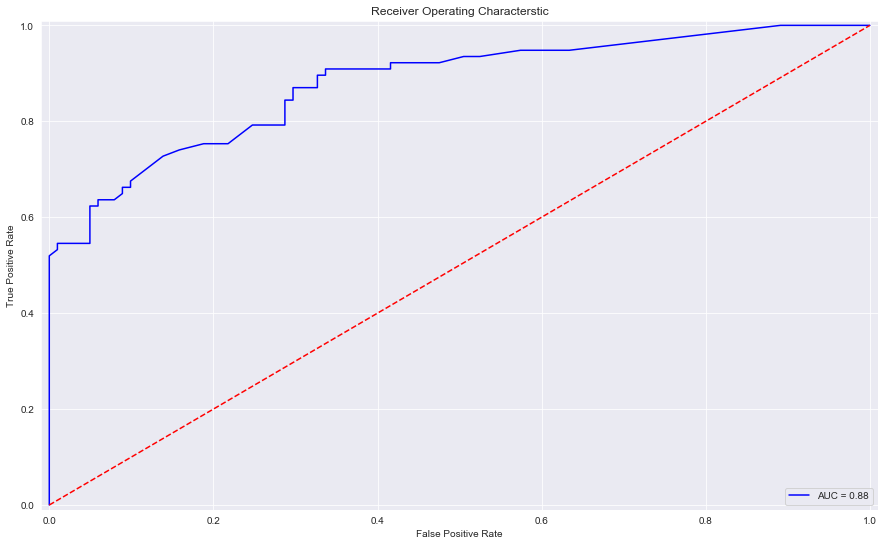

In [157]:
print(metrics.classification_report(y_test, test_pred))
plot_roc_curve(y_test, probs)

## 8. Final Prediction

In [145]:
test_pred = eclf.predict(test)

In [146]:
index = pd.DataFrame(test.index)
test_pred = pd.DataFrame(test_pred)

In [147]:
index.shape

(418, 1)

In [148]:
test_pred.shape

(418, 1)

In [149]:
final = pd.concat([index, test_pred],axis=1)

In [150]:
final

,0,0
0,891,0.0
1,892,0.0
2,893,0.0
3,894,0.0
4,895,0.0
5,896,0.0
6,897,1.0
7,898,0.0
8,899,1.0
9,900,0.0


In [2434]:
final.to_csv("final_submission.csv")